# ADS Project

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1) Load and Cleaning Data

In [71]:
#load Data Functions
def read_data_from_csv(pathInput, columnName, df_list):
    dfColumn = pd.read_csv(pathInputDir + pathInput, delimiter=',', dtype='str', header=0)
    df_list[columnName] = dfColumn
    return df_list


In [72]:
#list of input columns
columns = [
    "MarketCap",
    "AddressCount", 
    "TxGrowth",
    "Difficulty",
    "NetworkHash",
    "NetworkUtilization",
    "TransactionFee",
    "AvgGasPrice",
    "BlockCountReward",
    "BlockSize",
    "BlockTime",
    "Ethersupply",
    "GasLimit",
    "GasUsed",
    "Uncles",
    "BtcPrice"
]

pathInputDir = "../Data Source"

# list of directories of Data
pathDir = [
    "/Currency Information/export-MarketCap.csv",
    "/General Information/export-AddressCount.csv",
    "/General Information/export-TxGrowth.csv",
    "/Network Information/export-BlockDifficulty.csv",
    "/Network Information/export-NetworkHash.csv",
    "/Network Information/export-NetworkUtilization.csv",
    "/Network Information/export-TransactionFee.csv",
    "/Blockchain Information/export-AvgGasPrice.csv",
    "/Blockchain Information/export-BlockCountRewards.csv",
    "/Blockchain Information/export-BlockSize.csv",
    "/Blockchain Information/export-BlockTime.csv",
    "/Blockchain Information/export-Ethersupply.csv",
    "/Blockchain Information/export-GasLimit.csv",
    "/Blockchain Information/export-GasUsed.csv",
    "/Blockchain Information/export-Uncles.csv",
    "/bitcoin/market-price-bitcoin.csv"
]

df_list = {}
for i in range(len(columns)):
    df_list = read_data_from_csv(pathDir[i], columns[i], df_list)
    

In [73]:
# Merging all df from df list

#copy market cap
df_data = df_list["MarketCap"].copy()
#drop timestamp since it's not needed
df_data.drop(columns ="UnixTimeStamp", inplace =True) 

#without marketCap and BtcPrice
for i in range(1,len(columns)-1):
    df_data[columns[i]] = df_list[columns[i]].Value.values
    
# Merging same date from the dfBTCPrice
df_data["BtcPrice"] = dfBTCPrice[1:].sort_index(ascending=False).Price.values


In [74]:
# Move target variables to the end of columns
target_var = df_data["Price"]
df_data = df_data.drop(columns="Price")
df_data["Price"] = target_var

In [75]:
# Converting from str
df_data.replace(',','', inplace=True,regex=True)

df_data1 = df_data.loc[:, df_data.columns != 'Date(UTC)'].astype('float')
df_data['Date(UTC)'] = df_data['Date(UTC)'].astype('datetime64')
df_data.loc[:, df_data.columns != 'Date(UTC)'] = df_data1

df_data.rename(columns={"Date(UTC)": "Date"}, inplace = True)

df_data.head()

,Date,Supply,MarketCap,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
0,2015-07-30,7.204931e+07,0.0,9205.0,8893.0,0.121,11.5297,0.0,0.0,0.0,6912.0,644.0,4.46,39316.09375,0.0,0.0,1299.0,287.0,0.0
1,2015-07-31,7.208550e+07,0.0,9361.0,0.0,0.603,51.4594,0.0,0.0,0.0,6863.0,582.0,12.58,36191.71875,0.0,0.0,511.0,283.7,0.0
2,2015-08-01,7.211320e+07,0.0,9476.0,0.0,0.887,57.7845,0.0,0.0,0.0,5293.0,575.0,16.34,27705.93750,0.0,0.0,334.0,280.5,0.0
3,2015-08-02,7.214143e+07,0.0,9563.0,0.0,1.020,67.9224,0.0,0.0,0.0,5358.0,581.0,16.12,28223.43750,0.0,0.0,394.0,281.4,0.0
4,2015-08-03,7.216940e+07,0.0,9639.0,0.0,1.126,74.5737,0.0,0.0,0.0,5280.0,587.0,16.37,27976.71875,0.0,0.0,443.0,281.6,0.0


In [76]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
Date                  1500 non-null datetime64[ns]
Supply                1500 non-null float64
MarketCap             1500 non-null float64
AddressCount          1500 non-null float64
TxGrowth              1500 non-null float64
Difficulty            1500 non-null float64
NetworkHash           1500 non-null float64
NetworkUtilization    1500 non-null float64
TransactionFee        1500 non-null float64
AvgGasPrice           1500 non-null float64
BlockCountReward      1500 non-null float64
BlockSize             1500 non-null float64
BlockTime             1500 non-null float64
Ethersupply           1500 non-null float64
GasLimit              1500 non-null float64
GasUsed               1500 non-null float64
Uncles                1500 non-null float64
BtcPrice              1500 non-null float64
Price                 1500 non-null float64
dtypes: datetime64[ns](1), float64(18)
memory usag

In [77]:
df_data.describe()

,Supply,MarketCap,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
count,1.500000e+03,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.00000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1500.000000,1500.000000,1500.000000
mean,9.213726e+07,20230.152321,2.152700e+07,3.573513e+05,1381.216629,103992.366783,0.468355,3.479465e+20,2.968093e+10,5666.337333,11803.14200,15.364400,23750.603146,5.864147e+06,1.993741e+10,617.044667,4125.926667,204.687733
std,1.072118e+07,24510.382803,2.498827e+07,3.256708e+05,1298.972394,102427.282277,0.372758,4.951416e+20,4.294052e+10,720.416553,9993.41593,2.797517,6437.954850,2.149345e+06,1.830498e+10,370.151816,3947.399550,250.083641
min,7.204931e+07,0.000000,9.205000e+03,0.000000e+00,0.121000,11.529700,0.000000,0.000000e+00,0.000000e+00,2829.000000,575.00000,4.460000,12869.625000,0.000000e+00,0.000000e+00,126.000000,211.400000,0.000000
25%,8.278264e+07,917.140223,5.229082e+05,4.175475e+04,59.658250,4471.975825,0.056725,3.404057e+19,1.497751e+10,5234.250000,1523.00000,13.950000,20230.968750,4.009369e+06,1.351073e+09,376.000000,610.250000,10.950000
50%,9.407962e+07,14216.503048,5.975766e+06,3.061815e+05,1444.464500,92156.117400,0.569950,2.910479e+20,2.251696e+10,5946.000000,13026.50000,14.340000,21226.718750,6.715085e+06,1.554304e+10,462.500000,3418.500000,136.045000
75%,1.016003e+08,28674.968092,4.406175e+07,6.285058e+05,2505.067250,179726.672575,0.831900,4.513010e+20,2.688101e+10,6080.000000,20983.25000,16.370000,30987.929688,7.997891e+06,3.956602e+10,774.000000,6721.075000,295.085000
max,1.076359e+08,134295.814410,7.469110e+07,1.349890e+06,3606.036000,295911.997400,0.969000,5.862526e+21,9.395883e+11,6912.000000,36630.00000,30.310000,39316.093750,8.004217e+06,4.936428e+10,2096.000000,19345.500000,1385.020000


In [79]:
# Correlations
df_corr = df_data.corr()
df_corr

,Supply,MarketCap,AddressCount,TxGrowth,Difficulty,NetworkHash,NetworkUtilization,TransactionFee,AvgGasPrice,BlockCountReward,BlockSize,BlockTime,Ethersupply,GasLimit,GasUsed,Uncles,BtcPrice,Price
Supply,1.000000,0.531197,0.871879,0.843540,0.840346,0.823709,0.905329,0.474226,-0.337491,0.288837,0.870169,-0.187655,-0.792496,0.887071,0.902041,0.332875,0.733790,0.511601
MarketCap,0.531197,1.000000,0.364590,0.814322,0.697638,0.721280,0.726283,0.663019,-0.114254,0.036239,0.766030,-0.036038,-0.496392,0.662674,0.697703,0.773824,0.834641,0.999320
AddressCount,0.871879,0.364590,1.000000,0.789259,0.766725,0.782175,0.811562,0.380650,-0.233489,0.362446,0.804732,-0.288567,-0.857087,0.813752,0.891032,0.243759,0.651342,0.334379
TxGrowth,0.843540,0.814322,0.789259,1.000000,0.851423,0.875319,0.936036,0.647129,-0.214922,0.245369,0.965090,-0.197697,-0.808046,0.888451,0.959463,0.634506,0.923400,0.797612
Difficulty,0.840346,0.697638,0.766725,0.851423,1.000000,0.974904,0.928816,0.539480,-0.234873,0.041182,0.915648,0.019681,-0.788789,0.898953,0.904746,0.557167,0.751845,0.680616
NetworkHash,0.823709,0.721280,0.782175,0.875319,0.974904,1.000000,0.902719,0.550765,-0.232651,0.214247,0.901368,-0.173559,-0.740443,0.885202,0.928528,0.654439,0.782741,0.702010
NetworkUtilization,0.905329,0.726283,0.811562,0.936036,0.928816,0.902719,1.000000,0.627518,-0.236102,0.088811,0.975272,-0.017440,-0.859511,0.906912,0.961191,0.535564,0.845872,0.710283
TransactionFee,0.474226,0.663019,0.380650,0.647129,0.539480,0.550765,0.627518,1.000000,0.076165,0.034146,0.634351,-0.034050,-0.442397,0.542742,0.603379,0.582100,0.645400,0.659227
AvgGasPrice,-0.337491,-0.114254,-0.233489,-0.214922,-0.234873,-0.232651,-0.236102,0.076165,1.000000,-0.193311,-0.220846,0.141051,0.152590,-0.283996,-0.238085,-0.074185,-0.179950,-0.109099
BlockCountReward,0.288837,0.036239,0.362446,0.245369,0.041182,0.214247,0.088811,0.034146,-0.193311,1.000000,0.110668,-0.966166,0.038047,0.174196,0.292405,0.265952,0.238820,0.018776


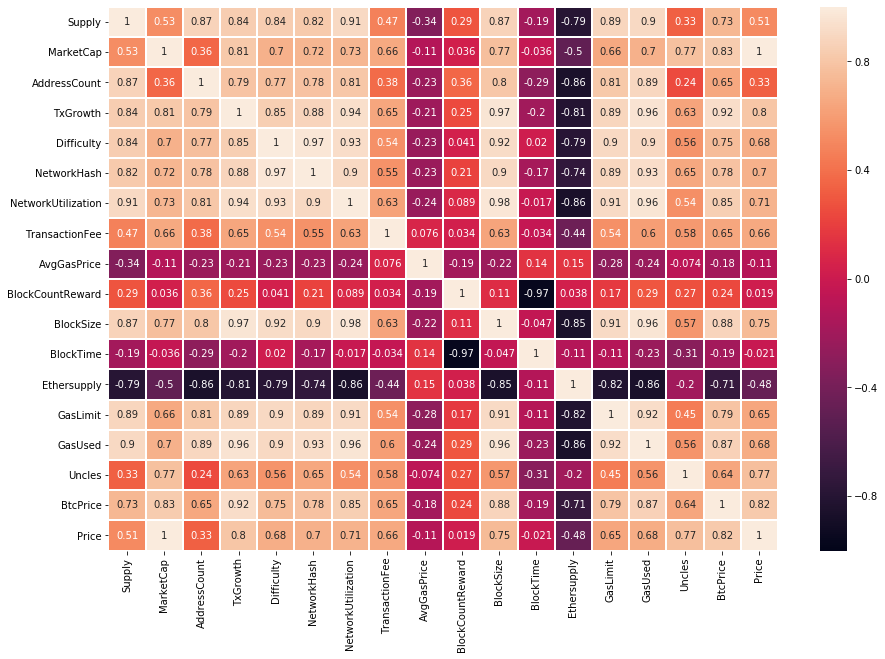

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,linecolor='white',linewidth='1',annot=True,vmin=-1)

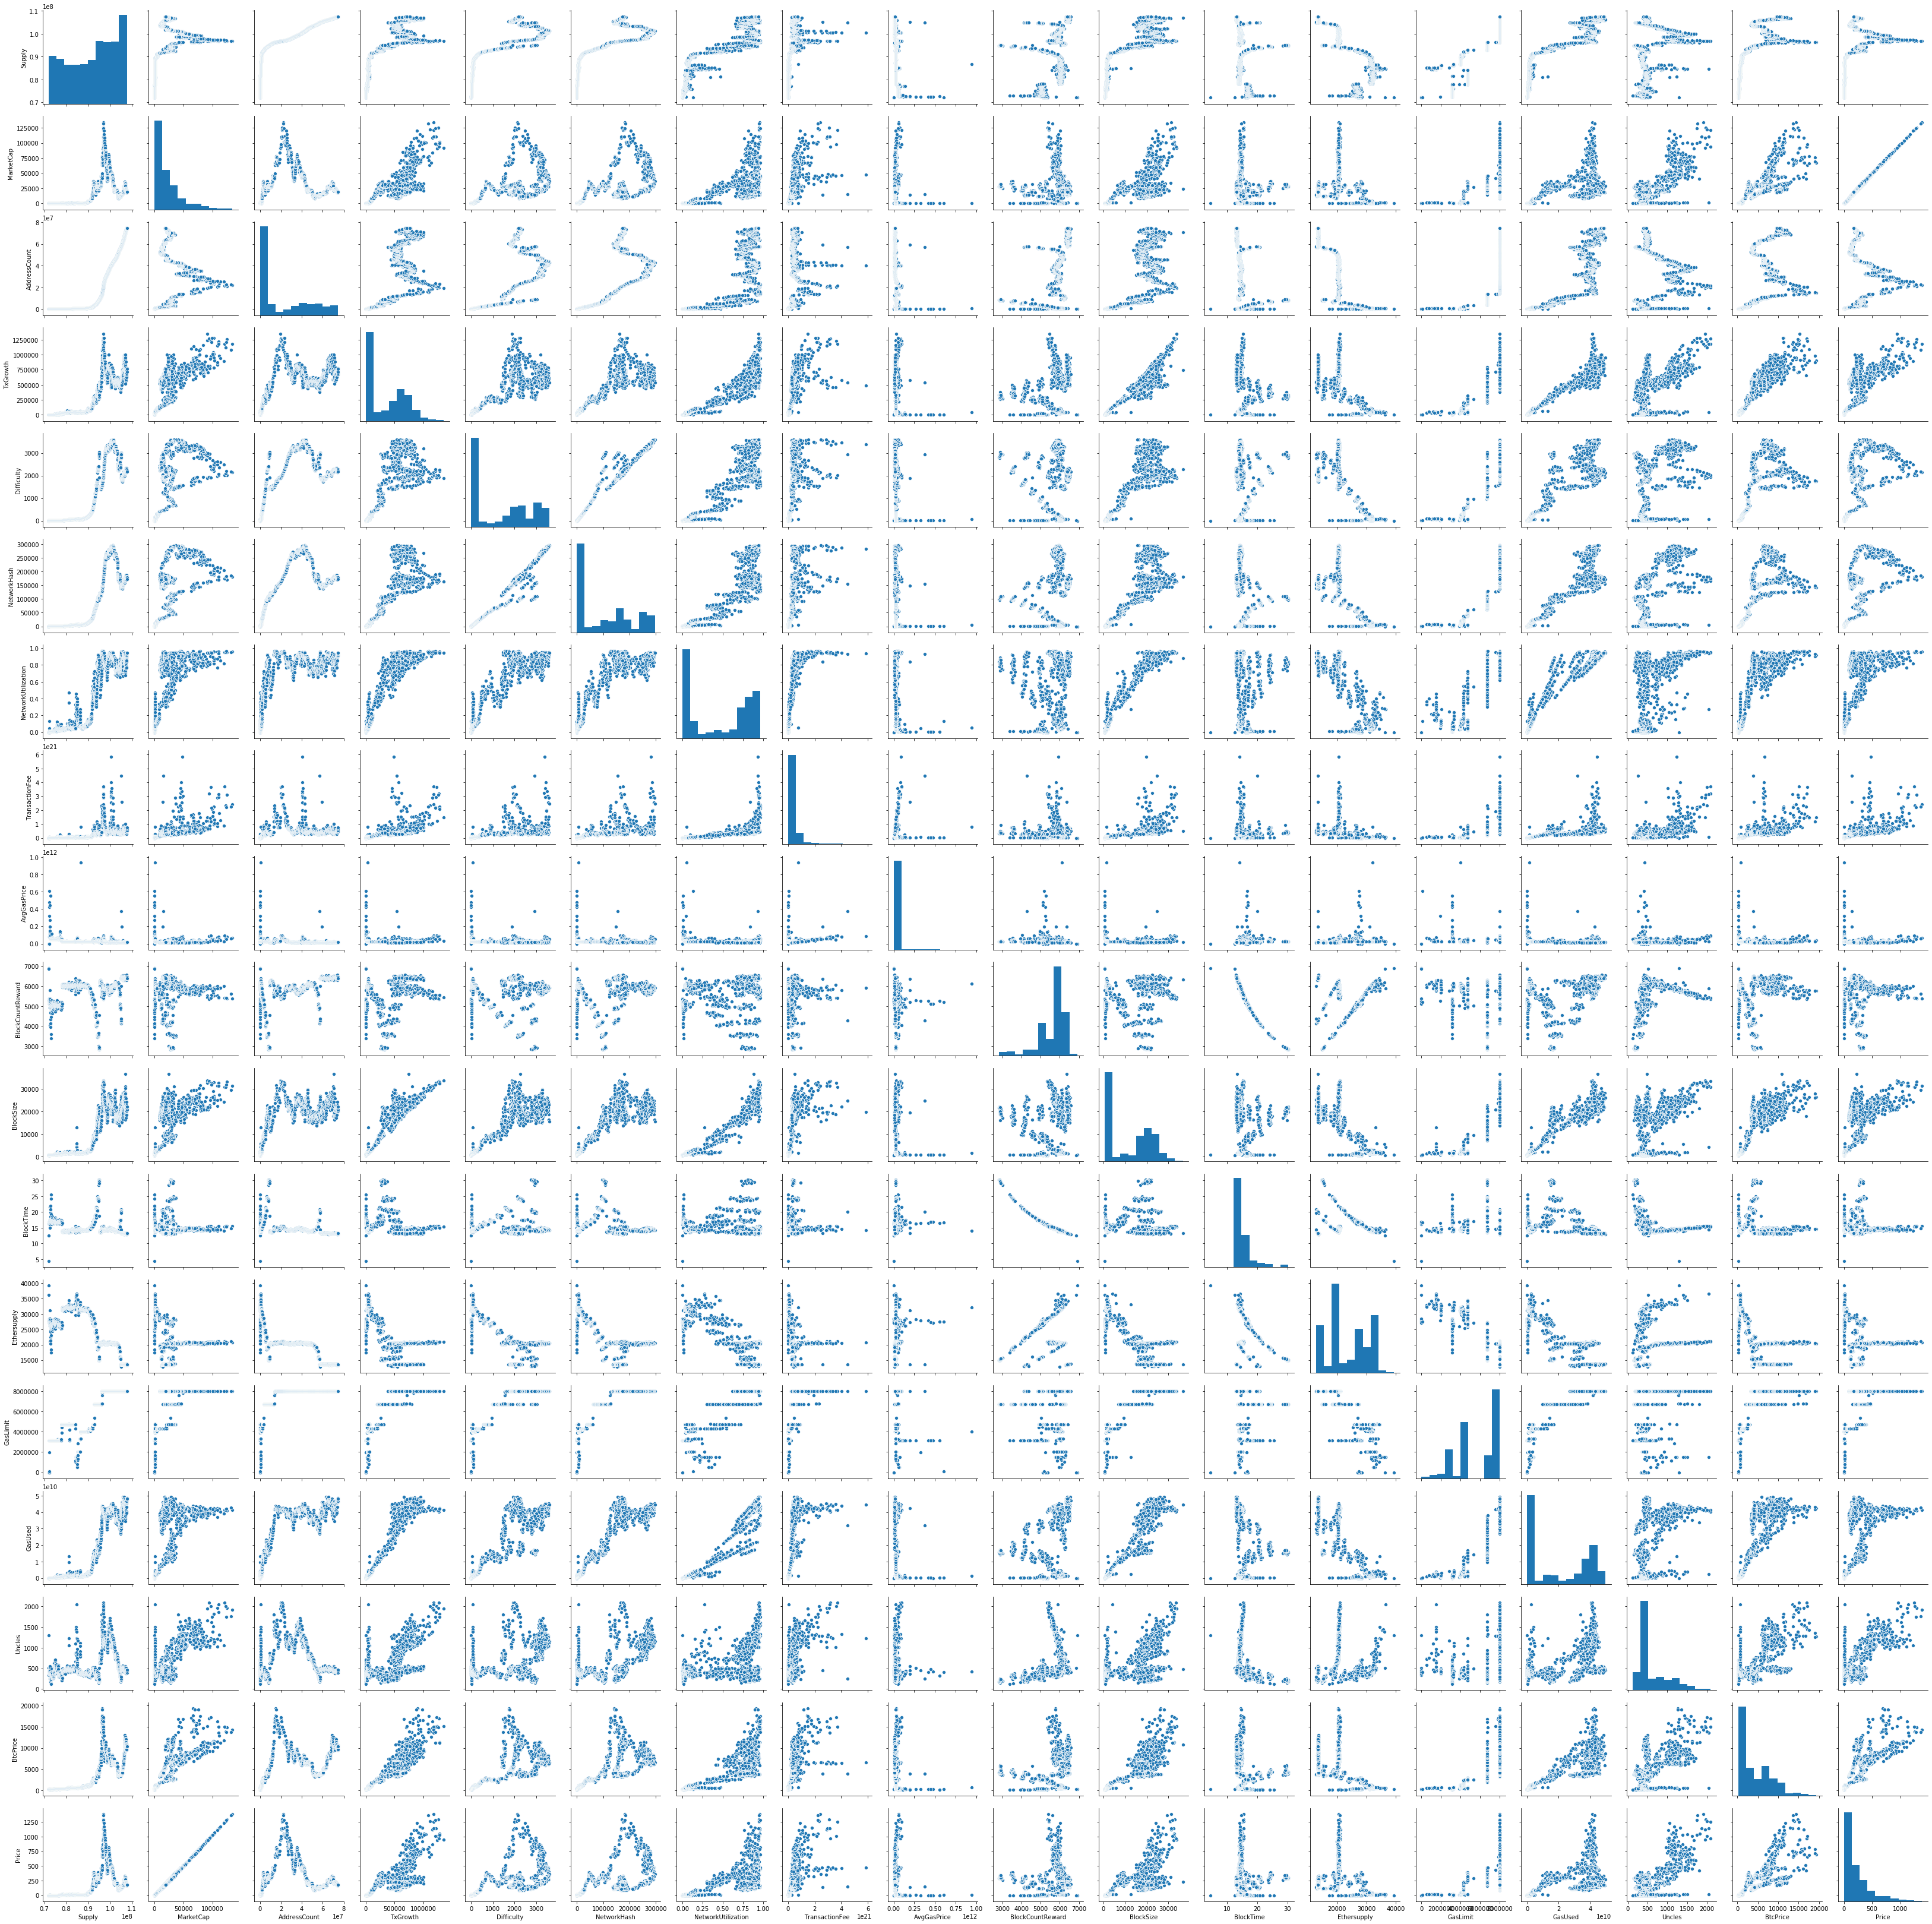

In [81]:
# Visualizations
sns.pairplot(df_data)
plt.show()

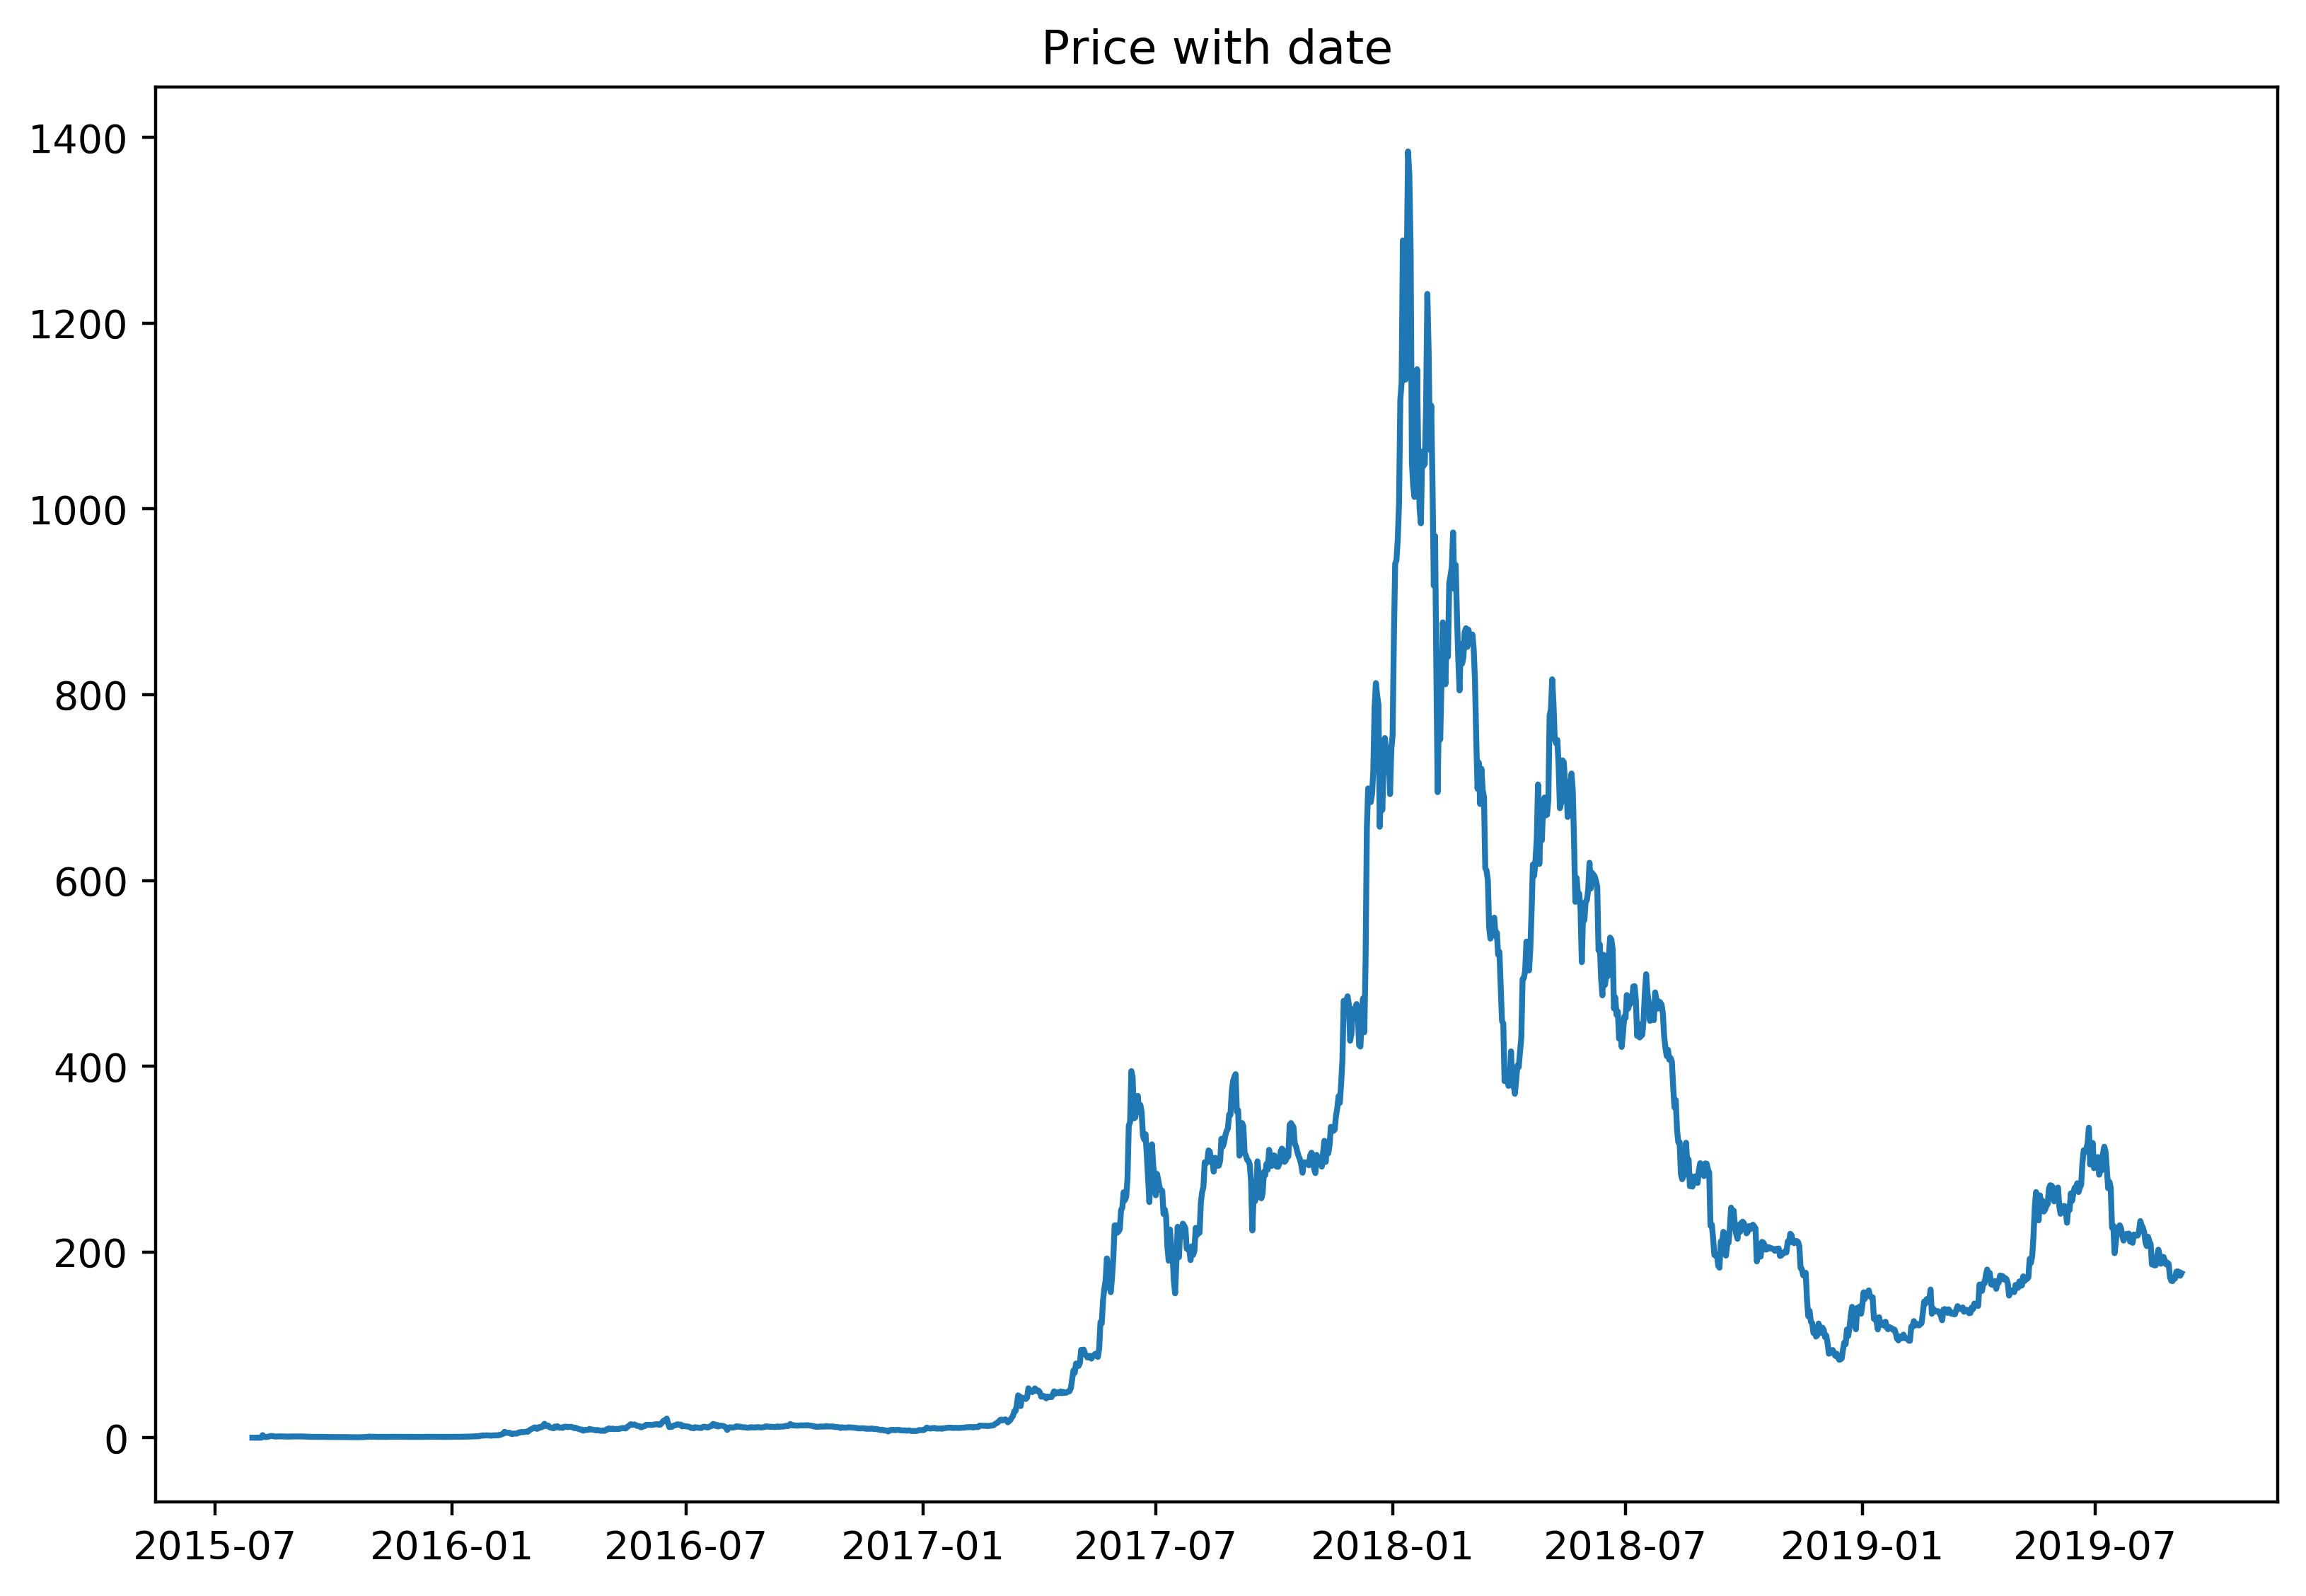

In [83]:
x = df_data['Date']
y = df_data['Price']

fig = plt.figure(figsize=(15,10),dpi=400)
axes = fig.add_axes([0.5,0.5,0.5,0.5])
axes.plot(x,y)
axes.set_title('Price with date')

plt.show()